# Roll Call Vote 117th Congress - 1st Session Analysis

In [ ]:
# Dataset: https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00195.htm

## Read the data and bring it to a dataframe

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00195.htm"

In [ ]:
r = requests.get(url)

In [ ]:
soup = BeautifulSoup(r.text, "html.parser")

In [ ]:
print(soup.find_all('span',{"class":"contenttext"}))

[<span class="contenttext">Baldwin (D-WI), <b>Yea</b>
<br/>Barrasso (R-WY), <b>Nay</b>
<br/>Bennet (D-CO), <b>Yea</b>
<br/>Blackburn (R-TN), <b>Nay</b>
<br/>Blumenthal (D-CT), <b>Yea</b>
<br/>Blunt (R-MO), <b>Nay</b>
<br/>Booker (D-NJ), <b>Yea</b>
<br/>Boozman (R-AR), <b>Nay</b>
<br/>Braun (R-IN), <b>Nay</b>
<br/>Brown (D-OH), <b>Yea</b>
<br/>Burr (R-NC), <b>Nay</b>
<br/>Cantwell (D-WA), <b>Yea</b>
<br/>Capito (R-WV), <b>Nay</b>
<br/>Cardin (D-MD), <b>Yea</b>
<br/>Carper (D-DE), <b>Yea</b>
<br/>Casey (D-PA), <b>Yea</b>
<br/>Cassidy (R-LA), <b>Nay</b>
<br/>Collins (R-ME), <b>Nay</b>
<br/>Coons (D-DE), <b>Yea</b>
<br/>Cornyn (R-TX), <b>Nay</b>
<br/>Cortez Masto (D-NV), <b>Yea</b>
<br/>Cotton (R-AR), <b>Nay</b>
<br/>Cramer (R-ND), <b>Nay</b>
<br/>Crapo (R-ID), <b>Nay</b>
<br/>Cruz (R-TX), <b>Nay</b>
<br/>Daines (R-MT), <b>Nay</b>
<br/>Duckworth (D-IL), <b>Yea</b>
<br/>Durbin (D-IL), <b>Yea</b>
<br/>Ernst (R-IA), <b>Nay</b>
<br/>Feinstein (D-CA), <b>Yea</b>
<br/>Fischer (R-NE), <b>Nay</b>


In [ ]:
print(soup.find_all('div',{'class':'contenttext responsive_col'}))

[<div class="contenttext responsive_col" width="33%">
<b>Alabama:</b>
</div>, <div class="contenttext responsive_col" width="33%">Shelby (R-AL), <b>Nay</b>
</div>, <div class="contenttext responsive_col" width="33%">Tuberville (R-AL), <b>Nay</b>
</div>, <div class="contenttext responsive_col" width="33%">
<b>Alaska:</b>
</div>, <div class="contenttext responsive_col" width="33%">Murkowski (R-AK), <b>Not Voting</b>
</div>, <div class="contenttext responsive_col" width="33%">Sullivan (R-AK), <b>Nay</b>
</div>, <div class="contenttext responsive_col" width="33%">
<b>Arizona:</b>
</div>, <div class="contenttext responsive_col" width="33%">Kelly (D-AZ), <b>Yea</b>
</div>, <div class="contenttext responsive_col" width="33%">Sinema (D-AZ), <b>Yea</b>
</div>, <div class="contenttext responsive_col" width="33%">
<b>Arkansas:</b>
</div>, <div class="contenttext responsive_col" width="33%">Boozman (R-AR), <b>Nay</b>
</div>, <div class="contenttext responsive_col" width="33%">Cotton (R-AR), <b>Nay

### Extractinng senetors names

In [ ]:
import re

pattern = '<[^<]+?>'
senetors_names = re.sub(pattern,"",str(soup.find_all('span',{"class":"contenttext"})[0]))
print(senetors_names[:100])

s_name = []
s_vote = []
s_group=[]

for senetor in senetors_names.split('\n'):
  senetor = senetor.replace("Not Voting","Not_Voting")
  lst = senetor.split(' ')
  if len(lst[0])==0:
    continue
  vote = lst[-1]

  special_chars=list(',()')
  for ch in special_chars:
      # print(lst)
      lst[-2]=lst[-2].replace(ch,'')
  group = lst[-2]
  lst = lst[:-2]
  name = " ".join(lst)
  s_name.append(name)
  s_vote.append(vote)
  s_group.append(group)

print('s_name: ',s_name)
print('s_group :',s_group)
print('s_vote :',s_vote)


Baldwin (D-WI), Yea
Barrasso (R-WY), Nay
Bennet (D-CO), Yea
Blackburn (R-TN), Nay
Blumenthal (D-CT),
s_name:  ['Baldwin', 'Barrasso', 'Bennet', 'Blackburn', 'Blumenthal', 'Blunt', 'Booker', 'Boozman', 'Braun', 'Brown', 'Burr', 'Cantwell', 'Capito', 'Cardin', 'Carper', 'Casey', 'Cassidy', 'Collins', 'Coons', 'Cornyn', 'Cortez Masto', 'Cotton', 'Cramer', 'Crapo', 'Cruz', 'Daines', 'Duckworth', 'Durbin', 'Ernst', 'Feinstein', 'Fischer', 'Gillibrand', 'Graham', 'Grassley', 'Hagerty', 'Hassan', 'Hawley', 'Heinrich', 'Hickenlooper', 'Hirono', 'Hoeven', 'Hyde-Smith', 'Inhofe', 'Johnson', 'Kaine', 'Kelly', 'Kennedy', 'King', 'Klobuchar', 'Lankford', 'Leahy', 'Lee', 'Lujan', 'Lummis', 'Manchin', 'Markey', 'Marshall', 'McConnell', 'Menendez', 'Merkley', 'Moran', 'Murkowski', 'Murphy', 'Murray', 'Ossoff', 'Padilla', 'Paul', 'Peters', 'Portman', 'Reed', 'Risch', 'Romney', 'Rosen', 'Rounds', 'Rubio', 'Sanders', 'Sasse', 'Schatz', 'Schumer', 'Scott', 'Scott', 'Shaheen', 'Shelby', 'Sinema', 'Smith', 

In [ ]:
import pandas as pd

senetor_df = pd.DataFrame({'name':s_name, 'group':s_group, 'vote':s_vote})
senetor_df.head()

,name,group,vote
0,Baldwin,D-WI,Yea
1,Barrasso,R-WY,Nay
2,Bennet,D-CO,Yea
3,Blackburn,R-TN,Nay
4,Blumenthal,D-CT,Yea


In [ ]:
senetor_df.shape

(100, 3)

In [ ]:
# Q1. How many democrats did not vote?
print("Q1. How many democrats did not vote?\n Ans: ",senetor_df[senetor_df.vote=='Not_Voting'].shape[0])

Q1. How many democrats did not vote?
 Ans:  2


In [ ]:
senetor_df.vote.unique()

array(['Yea', 'Nay', 'Not_Voting'], dtype=object)

In [ ]:
# Q2. How many republicans voted Yea?
print("How many republicans voted Yea?\n Ans: ",senetor_df[(senetor_df.vote=='Yea')&(senetor_df.group.str.startswith('R'))].shape[0])

How many republicans voted Yea?
 Ans:  0


In [ ]:
# Q3. What's the total number of Yea votes from all senators whose name starts with "B"?
sdf_yea_startswithB = senetor_df[(senetor_df.vote=='Yea')& (senetor_df['name'].str.startswith('B'))]
print("Q3. What's the total number of Yea votes from all senators whose name starts with \"B\"?\nAns: ",sdf_yea_startswithB.shape[0])

Q3. What's the total number of Yea votes from all senators whose name starts with "B"?
Ans:  5


In [ ]:
senetor_df_x=senetor_df.copy()
senetor_df_x['group'] = senetor_df['group'].apply(lambda x: x[2:])

In [ ]:
# Q4. How many states voted all Yay?
print("Q4. How many states voted all Yay?\nAns: ",senetor_df_x[(senetor_df_x.vote=='Yea')].groupby('group').count().index.shape[0])

Q4. How many states voted all Yay?
Ans:  28


In [ ]:
# Q5. How many states had at least 1 non-voting senator?
print("How many states had at least 1 non-voting senator?")
print(len(senetor_df_x[senetor_df_x.vote=='Not_Voting'].group.unique()))

How many states had at least 1 non-voting senator?
2


In [ ]:
# Q6. How many states have both Republican senators?
senetor_df['state']=senetor_df.group.str[-2:]
senetor_df.head()

,name,group,vote,state
0,Baldwin,D-WI,Yea,WI
1,Barrasso,R-WY,Nay,WY
2,Bennet,D-CO,Yea,CO
3,Blackburn,R-TN,Nay,TN
4,Blumenthal,D-CT,Yea,CT


In [ ]:
sdf_R_groupby_state_count_gte2 = senetor_df[senetor_df.group.str.startswith('R')][['name','state']].groupby('state').count().reset_index()
sdf_R_groupby_state_count_gte2.head()

,state,name
0,AK,2
1,AL,2
2,AR,2
3,FL,2
4,IA,2


In [ ]:
print("Q6. How many states have both Republican senators?")
print(sdf_R_groupby_state_count_gte2.shape[0])

Q6. How many states have both Republican senators?
28


In [ ]:

# How many states have both Republican and Democrat senators?
senetor_df.head()

,name,group,vote,state
0,Baldwin,D-WI,Yea,WI
1,Barrasso,R-WY,Nay,WY
2,Bennet,D-CO,Yea,CO
3,Blackburn,R-TN,Nay,TN
4,Blumenthal,D-CT,Yea,CT


In [ ]:
senetor_state_R_set = set(senetor_df[senetor_df.group.str.startswith('R')].state)
senetor_state_D_set = set(senetor_df[senetor_df.group.str.startswith('D')].state)
senetor_state_with_RD = senetor_state_R_set.intersection(senetor_state_D_set)
print('How many states have both Republican and Democrat senators?')
print(len(senetor_state_with_RD))

How many states have both Republican and Democrat senators?
5


In [ ]:
# Q8. How many Senators have their names starting with W?
print("Q8. How many Senators have their names starting with W?")
print(senetor_df[senetor_df.name.str.startswith('W')].shape[0])

Q8. How many Senators have their names starting with W?
6


In [ ]:
# Q9. What is the votes ratio of Democrats' major decision to Republicans' major decision ?
vote_count_D = senetor_df[(senetor_df.group.str.startswith('D'))&(senetor_df.vote.str.startswith('Yea'))].shape[0]
vote_count_R = senetor_df[(senetor_df.group.str.startswith('R'))&(senetor_df.vote=='Nay')].shape[0]
# print(vote_count_D)
# print(vote_count_R)
print("Q9. What is the votes ratio of Democrats' major decision to Republicans' major decision ?")
print(vote_count_D/vote_count_R)

Q9. What is the votes ratio of Democrats' major decision to Republicans' major decision ?
1.0


In [ ]:
senetor_df.groupby('vote').count()

,name,group,state
vote,,,
Nay,48,48,48
Not_Voting,2,2,2
Yea,50,50,50


In [ ]:
senetor_df["party"]=senetor_df.group.str[0]
senetor_df.groupby(['party','vote']).count()

name  group  state
party vote                          
D     Yea           48     48     48
I     Yea            2      2      2
R     Nay           48     48     48
      Not_Voting     2      2      2

# TODO

In [ ]:
# Q 10. What is the highest absolute difference in percentage between yea and nay senators among the different parties?


In [ ]:
# Q11. How many Democrats voted Yea?
print("Q11. How many Democrats voted Yea?")
print(senetor_df.groupby(['party','vote']).count().loc['D'].loc['Yea'][0])

Q11. How many Democrats voted Yea?
48


In [ ]:
# Q12. How many states voted all Nay?
print("How many states voted all Nay?")
# states_voted_nay_set - (states_voted_yes_set.union(states_voted_not_voting_set))
states_voted_nay_set = set(senetor_df[senetor_df.vote == 'Nay'].state)
states_voted_yes_set = set(senetor_df[senetor_df.vote == 'Yea'].state)
states_voted_not_voting_set = set(senetor_df[senetor_df.vote == 'Not_Voting'].state)

# print(states_voted_nay_set, states_voted_yes_set, states_voted_not_voting_set)
states_all_nay = states_voted_nay_set.difference(states_voted_yes_set.union(states_voted_not_voting_set))
print(len(states_all_nay))
print(states_all_nay)

How many states voted all Nay?
20
{'MS', 'TX', 'LA', 'UT', 'WY', 'SC', 'TN', 'AL', 'IN', 'NE', 'IA', 'SD', 'MO', 'NC', 'ND', 'ID', 'AR', 'KS', 'KY', 'OK'}


## TODO
* How many states have both Democrat senators? Ans:21
* How many senators did not vote? Ans: 2
* How many states had at least 1 senator not voted? Ans: 2 as both senetors voted are from diff states
* Ratio of number of rows to the number of columns in your dataset?
* Plot the stacked barchart with the parties(x-axis) and number of votes(y-axis) with stacks as ‘Yea’ and ‘Nay’ ?
* Pie chart of Republican votes ?
* Plot the crosstab of Party and Yea/Nay as a heat map with the values
* Pie chart representing the number of states in which Democrats domination, Republican domination and Democrats, Republicans in equal ?

In [ ]:
# How many states have both Democrat senators?
# senetor_df.head()

In [ ]:
st_D_groupby_count = senetor_df[senetor_df.party=='D'][['state','party','name']].groupby(['state','party']).count().reset_index().rename(columns={'name':'count_senetors'})

In [ ]:
st_D_groupby_count = st_D_groupby_count[st_D_groupby_count.count_senetors>=2]
print("How many states have both Democrat senators?")
print(st_D_groupby_count.shape[0])

How many states have both Democrat senators?
21


In [ ]:
print("Ratio of number of rows to the number of columns in your dataset?")
senetor_df[['name','group','vote']].shape[0]/senetor_df[['name','group','vote']].shape[1]

Ratio of number of rows to the number of columns in your dataset?


33.333333333333336

In [ ]:
# Plot the stacked barchart with the parties(x-axis) and number of votes(y-axis) with stacks as ‘Yea’ and ‘Nay’ ?
# senetor_df[senetor_df.group.str.startswith('I')]

In [ ]:
senetor_df['party']=senetor_df.party.map({"D": "Democrate","R":"Republic","I":"Independent"})
# senetor_df.head()

,name,group,vote,state,party
0,Baldwin,D-WI,Yea,WI,Democrate
1,Barrasso,R-WY,Nay,WY,Republic
2,Bennet,D-CO,Yea,CO,Democrate
3,Blackburn,R-TN,Nay,TN,Republic
4,Blumenthal,D-CT,Yea,CT,Democrate


In [ ]:
senetor_df.party.unique()

array(['Democrate', 'Republic', 'Independent'], dtype=object)

In [ ]:
import pandas as pd
ps = pd.pivot_table(data=senetor_df[['party','vote']],index='party',columns=senetor_df.vote,aggfunc='count').fillna(0).unstack()
ps

      vote        party      
vote  Nay         Democrate       0.0
                  Independent     0.0
                  Republic       48.0
      Not_Voting  Democrate       0.0
                  Independent     0.0
                  Republic        2.0
      Yea         Democrate      48.0
                  Independent     2.0
                  Republic        0.0
dtype: float64

In [ ]:
bdf = pd.DataFrame({'Nay':ps['vote']['Nay'],'Yea':ps['vote']['Yea']})
bdf

,Nay,Yea
party,,
Democrate,0.0,48.0
Independent,0.0,2.0
Republic,48.0,0.0


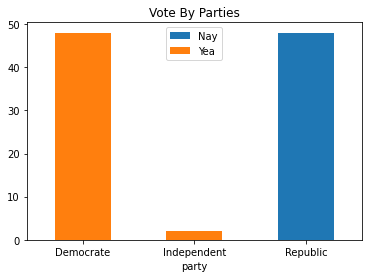

In [ ]:
import matplotlib.pyplot as plt
bdf.plot.bar(stacked=True, title='Vote By Parties')
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# Pie chart of Republican votes ?
senetor_df.head()

,name,group,vote,state,party
0,Baldwin,D-WI,Yea,WI,Democrate
1,Barrasso,R-WY,Nay,WY,Republic
2,Bennet,D-CO,Yea,CO,Democrate
3,Blackburn,R-TN,Nay,TN,Republic
4,Blumenthal,D-CT,Yea,CT,Democrate


In [ ]:
import pandas as pd
ps = pd.pivot_table(data=senetor_df[['party','vote']],index='party',columns=senetor_df.vote,aggfunc='count').fillna(0).unstack()
bdf = pd.DataFrame({'Nay':ps['vote']['Nay'],'Yea':ps['vote']['Yea'],'Not_Voting':ps['vote']['Not_Voting']})
bdf

,Nay,Yea,Not_Voting
party,,,
Democrate,0.0,48.0,0.0
Independent,0.0,2.0,0.0
Republic,48.0,0.0,2.0


In [ ]:
bdf_R = bdf.loc[bdf.index=='Republic']
bdf_R.iloc[0].to_list()

[48.0, 0.0, 2.0]

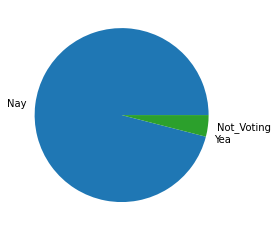

In [ ]:
plt.pie(bdf_R.iloc[0].to_list(),labels=bdf_R.columns)
plt.show()

## TODO
* Plot the crosstab of Party and Yea/Nay as a heat map with the values
* Pie chart representing the number of states in which Democrats domination, Republican domination and Democrats, Republicans in equal ?